In [19]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

# 设置文件路径
data_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast+cancer+wisconsin+diagnostic/wdbc.data"
output_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv"

# 定义列名
column_names = ["ID", "Diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
                "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
                "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
                "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se",
                "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
                "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
                "symmetry_worst", "fractal_dimension_worst"]

# 读取数据
if os.path.exists(data_file_path):
    df = pd.read_csv(data_file_path, header=None, names=column_names)

    # 删除无用的 ID 列
    df.drop(columns=["ID"], inplace=True)

    # 将目标变量 Diagnosis 转换为数值 (M=1, B=0)
    df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

    # 归一化数据（不包括 Diagnosis）
    scaler = StandardScaler()
    df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

    # 保存清理后的数据
    df.to_csv(output_file_path, index=False)
    print(f" 清理后的数据已保存到: {output_file_path}")

else:
    print(" 文件路径错误，请检查文件是否存在。")

 清理后的数据已保存到: /Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv


In [20]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
data_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv"
df = pd.read_csv(data_path)

# 目标变量
y = df["Diagnosis"]

# 存储回归结果
regression_results = []

for col in df.columns[1:]:  # 跳过 Diagnosis
    X = df[[col]]
    X_with_const = sm.add_constant(X)  # 添加常数项

    # 运行线性回归
    model = sm.OLS(y, X_with_const).fit()

    # 获取回归结果
    coefficient = model.params.iloc[1]  # 变量的回归系数
    p_value = model.pvalues.iloc[1]  # p-value
    r2_score = model.rsquared  # R² 线性拟合得分

    regression_results.append({
        "Feature": col,
        "Coefficient": coefficient,
        "P_value": p_value,
        "R2_LinearFit": r2_score
    })

# 转换为 DataFrame 并打印
regression_results_df = pd.DataFrame(regression_results)
regression_results_df = regression_results_df.sort_values(by="P_value")

print("\n Linear Regression Analysis：")
print(regression_results_df)


 Linear Regression Analysis：
                    Feature  Coefficient        P_value  R2_LinearFit
27     concave_points_worst     0.383683  1.969100e-124      0.629747
22          perimeter_worst     0.378533  5.771397e-119      0.612955
7       concave_points_mean     0.375487  7.101150e-116      0.603129
20             radius_worst     0.375410  8.482292e-116      0.602880
2            perimeter_mean     0.359059  8.436251e-101      0.551508
23               area_worst     0.354799   2.828848e-97      0.538499
0               radius_mean     0.352963   8.465941e-96      0.532942
3                 area_mean     0.342788   4.734564e-88      0.502658
6            concavity_mean     0.336685   9.966556e-84      0.484917
26          concavity_worst     0.318917   2.464664e-72      0.435086
5          compactness_mean     0.288420   3.938263e-56      0.355852
25        compactness_worst     0.285743   7.069816e-55      0.349279
10                radius_se     0.274205   9.738949e-50     

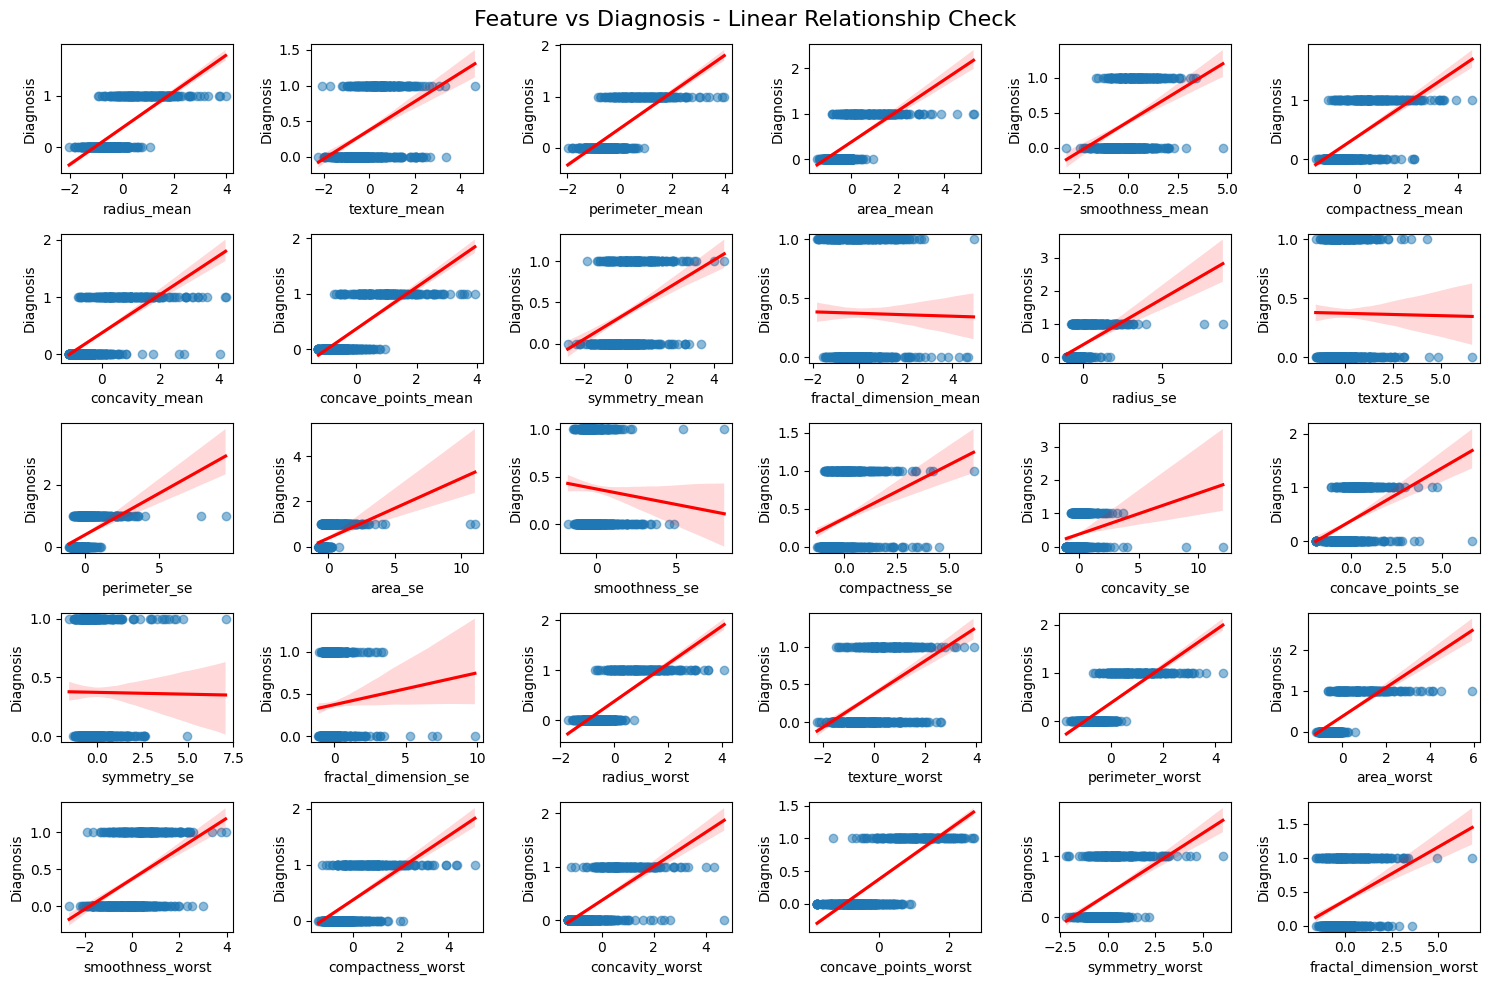


 线性关系分析结果：
                    Feature  Pearson_Correlation  Spearman_Correlation  \
27     concave_points_worst             0.793566              0.781674   
22          perimeter_worst             0.782914              0.796319   
7       concave_points_mean             0.776614              0.777877   
20             radius_worst             0.776454              0.787933   
2            perimeter_mean             0.742636              0.748496   
23               area_worst             0.733825              0.786902   
0               radius_mean             0.730029              0.732785   
3                 area_mean             0.708984              0.734122   
6            concavity_mean             0.696360              0.733308   
26          concavity_worst             0.659610              0.705734   
5          compactness_mean             0.596534              0.609288   
25        compactness_worst             0.590998              0.606810   
10                radius_s

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

# ========== 1. 读取数据 ==========
df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")

# 目标变量
y = df["Diagnosis"]

# ========== 2. 变量线性关系可视化（散点图 + 线性拟合）==========
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns[1:], 1):  # 跳过 Diagnosis 这一列
    plt.subplot(5, 6, i)
    sns.regplot(x=df[col], y=y, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
    plt.xlabel(col)
    plt.ylabel("Diagnosis")

plt.suptitle("Feature vs Diagnosis - Linear Relationship Check", fontsize=16)
plt.tight_layout()
plt.show()

# ========== 3. 计算 Pearson 相关性 & Spearman 相关性 ==========
linear_results = []

for col in df.columns[1:]:  # 跳过 Diagnosis
    X = df[[col]]
    
    # 计算 Pearson 相关系数（线性相关性）
    pearson_corr = df[col].corr(y)
    
    # 计算 Spearman 相关系数（非线性相关性）
    spearman_corr, _ = spearmanr(df[col], y)
    
    # 线性回归 R² 值
    model = LinearRegression()
    model.fit(X, y)
    r2_score = model.score(X, y)
    
    linear_results.append({
        "Feature": col,
        "Pearson_Correlation": pearson_corr,
        "Spearman_Correlation": spearman_corr,
        "R2_LinearFit": r2_score
    })

# 转换为 DataFrame 并显示
linear_results_df = pd.DataFrame(linear_results)

#  修正：改用 print() 显示结果
print("\n 线性关系分析结果：")
print(linear_results_df.sort_values(by="Pearson_Correlation", ascending=False))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc as sk_auc
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

# 读取原始数据
raw_df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")

# 计算每个变量的线性回归结果（R^2 和 P-Value）//calculate the R^2 and p-value
feature_cols = raw_df.drop(columns=["Diagnosis"]).columns.tolist()
linreg_results = []

for col in feature_cols:
    X = sm.add_constant(raw_df[[col]])
    y = raw_df["Diagnosis"]
    model = sm.OLS(y, X).fit()
    linreg_results.append({
        "Feature": col,
        "R2": model.rsquared,
        "P_value": model.pvalues.iloc[1]
    })

linreg_df = pd.DataFrame(linreg_results)

# 选择 R^2 > 0.5 且 p 值极小的变量/select colomn that r^2>0.5 and P_value is small
filtered_features = linreg_df[(linreg_df["R2"] > 0.5) & (linreg_df["P_value"] < 0.05)]["Feature"].tolist()

print("selected cols based on linear regression:", filtered_features)

# 处理过的数据 (特征筛选后)
processed_df = raw_df.copy()
processed_X = processed_df[filtered_features]
processed_y = processed_df['Diagnosis']

# 原始数据（所有特征）
raw_X = raw_df.drop(columns=['Diagnosis'])
raw_y = raw_df['Diagnosis']

# 训练测试集拆分
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_X, raw_y, test_size=0.2, random_state=42)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(processed_X, processed_y, test_size=0.2, random_state=42)

# 使用 SMOTE 处理类别不平衡/ apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_raw_resampled, y_train_raw_resampled = smote.fit_resample(X_train_raw, y_train_raw)
X_train_proc_resampled, y_train_proc_resampled = smote.fit_resample(X_train_proc, y_train_proc)

# 定义模型/def modles
models = {
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=2, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

# 存储结果
results = []

# 训练和评估模型（原始数据 & 处理过的数据）/train date, original data and processed data
for name, model in models.items():
    for data_type, X_train, X_test, y_train, y_test in zip([
        "Raw Data", "Processed Data"],
        [X_train_raw_resampled, X_train_proc_resampled],
        [X_test_raw, X_test_proc],
        [y_train_raw_resampled, y_train_proc_resampled],
        [y_test_raw, y_test_proc]
    ):
        print(f" train {name} modle{data_type}）...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        report = classification_report(y_test, y_pred, output_dict=True)

        results.append({
            "Model": name,
            "Data Type": data_type,
            "AUC-ROC": auc_score,
            "Precision_0": report['0']['precision'],
            "Recall_0": report['0']['recall'],
            "F1_0": report['0']['f1-score'],
            "Precision_1": report['1']['precision'],
            "Recall_1": report['1']['recall'],
            "F1_1": report['1']['f1-score'],
            "Accuracy": report['accuracy']
        })

# 转换结果为 DataFrame 并保存到 CSV/save result
results_df = pd.DataFrame(results)
output_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/train/analysis/linear-selected-model_comparison_results.csv"
results_df.to_csv(output_file_path, index=False)

print(f" results save to : {output_file_path}")

selected cols based on linear regression: ['radius_mean', 'perimeter_mean', 'area_mean', 'concave_points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']
 train SVM modleRaw Data）...
 train SVM modleProcessed Data）...
 train Random Forest modleRaw Data）...
 train Random Forest modleProcessed Data）...
 train XGBoost modleRaw Data）...
 train XGBoost modleProcessed Data）...
 train Logistic Regression modleRaw Data）...
 train Logistic Regression modleProcessed Data）...
 results save to : /Users/guohaoyang/Desktop/vscworkspace/breastCancer/train/analysis/linear-selected-model_comparison_results.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc as sk_auc
from imblearn.over_sampling import SMOTE

# 读取原始数据
raw_df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")

# 处理过的数据 (特征筛选后)/select based on linear, heatmap, and importance.
processed_df = raw_df.copy()
filtered_features = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'texture_se',
                     'smoothness_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
                     'smoothness_worst', 'symmetry_worst', 'concave_points_worst', 'perimeter_worst', 'concave_points_mean',
                     'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean']
##question: some cols are red in the heatmap, but they oth have high imporatnce rank, shoule I choose one of them or keep them two. eg,radius_mean and radius_worst.
processed_X = processed_df[filtered_features]
processed_y = processed_df['Diagnosis']

# 原始数据（所有特征）
raw_X = raw_df.drop(columns=['Diagnosis'])
raw_y = raw_df['Diagnosis']

# 训练测试集拆分
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_X, raw_y, test_size=0.2, random_state=42)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(processed_X, processed_y, test_size=0.2, random_state=42)

# 使用 SMOTE 处理类别不平衡//using Smote to handle
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_raw_resampled, y_train_raw_resampled = smote.fit_resample(X_train_raw, y_train_raw)
X_train_proc_resampled, y_train_proc_resampled = smote.fit_resample(X_train_proc, y_train_proc)

# 定义模型
models = {
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=2, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

}

# 存储结果
results = []

# 训练和评估模型（原始数据 & 处理过的数据）
for name, model in models.items():
    for data_type, X_train, X_test, y_train, y_test in zip([
        "Raw Data", "Processed Data"],
        [X_train_raw_resampled, X_train_proc_resampled],
        [X_test_raw, X_test_proc],
        [y_train_raw_resampled, y_train_proc_resampled],
        [y_test_raw, y_test_proc]
    ):
        print(f"\training  {name} model ({data_type})...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results.append({
            "Model": name,
            "Data Type": data_type,
            "AUC-ROC": auc_score,
            "Precision_0": report['0']['precision'],
            "Recall_0": report['0']['recall'],
            "F1_0": report['0']['f1-score'],
            "Precision_1": report['1']['precision'],
            "Recall_1": report['1']['recall'],
            "F1_1": report['1']['f1-score'],
            "Accuracy": report['accuracy']
        })

# 转换结果为 DataFrame 并保存到 CSV
results_df = pd.DataFrame(results)
output_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/train/analysis/all-method-model_comparison_results.csv"
results_df.to_csv(output_file_path, index=False)

print(f" 模型比较结果已保存到: {output_file_path}")

	raining  SVM model (Raw Data)...
	raining  SVM model (Processed Data)...
	raining  Random Forest model (Raw Data)...
	raining  Random Forest model (Processed Data)...
	raining  XGBoost model (Raw Data)...
	raining  XGBoost model (Processed Data)...
	raining  Logistic Regression model (Raw Data)...
	raining  Logistic Regression model (Processed Data)...
 模型比较结果已保存到: /Users/guohaoyang/Desktop/vscworkspace/breastCancer/train/analysis/all-method-model_comparison_results.csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc as sk_auc
from imblearn.over_sampling import SMOTE

# 读取原始数据
raw_df = pd.read_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv")

# 处理过的数据 (特征筛选后)/select based on the heatmap and importance
processed_df = raw_df.copy()
filtered_features = [
    'concave_points_worst', 'perimeter_worst', 'concave_points_mean',
    'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean'
]
processed_X = processed_df[filtered_features]
processed_y = processed_df['Diagnosis']

# 原始数据（所有特征）
raw_X = raw_df.drop(columns=['Diagnosis'])
raw_y = raw_df['Diagnosis']

# 训练测试集拆分
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(raw_X, raw_y, test_size=0.2, random_state=42)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(processed_X, processed_y, test_size=0.2, random_state=42)

# 使用 SMOTE 处理类别不平衡
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_raw_resampled, y_train_raw_resampled = smote.fit_resample(X_train_raw, y_train_raw)
X_train_proc_resampled, y_train_proc_resampled = smote.fit_resample(X_train_proc, y_train_proc)

# 定义模型
models = {
    "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=2, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

# 存储结果
results = []

# 训练和评估模型（原始数据 & 处理过的数据）
for name, model in models.items():
    for data_type, X_train, X_test, y_train, y_test in zip([
        "Raw Data", "Processed Data"],
        [X_train_raw_resampled, X_train_proc_resampled],
        [X_test_raw, X_test_proc],
        [y_train_raw_resampled, y_train_proc_resampled],
        [y_test_raw, y_test_proc]
    ):
        print(f"\training  {name} model ({data_type})...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results.append({
            "Model": name,
            "Data Type": data_type,
            "AUC-ROC": auc_score,
            "Precision_0": report['0']['precision'],
            "Recall_0": report['0']['recall'],
            "F1_0": report['0']['f1-score'],
            "Precision_1": report['1']['precision'],
            "Recall_1": report['1']['recall'],
            "F1_1": report['1']['f1-score'],
            "Accuracy": report['accuracy']
        })

# 转换结果为 DataFrame 并保存到 CSV
results_df = pd.DataFrame(results)
output_file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/train/analysis/non-linear-model_comparison_results.csv"
results_df.to_csv(output_file_path, index=False)

print(f" 模型比较结果已保存到: {output_file_path}")

	raining  SVM model (Raw Data)...
	raining  SVM model (Processed Data)...
	raining  Random Forest model (Raw Data)...
	raining  Random Forest model (Processed Data)...
	raining  XGBoost model (Raw Data)...
	raining  XGBoost model (Processed Data)...
	raining  Logistic Regression model (Raw Data)...
	raining  Logistic Regression model (Processed Data)...
 模型比较结果已保存到: /Users/guohaoyang/Desktop/vscworkspace/breastCancer/train/analysis/non-linear-model_comparison_results.csv


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
import statsmodels.api as sm

# 读取数据
file_path = "/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/breast_cancer.csv"
df = pd.read_csv(file_path)

# feature selection（R² > 0.5 且 p < 0.05）
feature_cols = df.drop(columns=["Diagnosis"]).columns.tolist()
linreg_results = []
for col in feature_cols:
    X = sm.add_constant(df[[col]])
    y = df["Diagnosis"]
    model = sm.OLS(y, X).fit()
    linreg_results.append({
        "Feature": col,
        "R2": model.rsquared,
        "P_value": model.pvalues.iloc[1]
    })
linreg_df = pd.DataFrame(linreg_results)
selected_features = linreg_df[(linreg_df["R2"] > 0.5) & (linreg_df["P_value"] < 0.05)]["Feature"].tolist()

# evaulate
results = []
def evaluate_model(X, y, method="TensorFlow", data_type="Raw Data"):
    # split + SMOTE + standlize
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_res)
    X_test_scaled = scaler.transform(X_test)

    if method == "TensorFlow":
        from tensorflow.keras import Input

        model = Sequential([
            Input(shape=(X_train_scaled.shape[1],)),# Input layer: expects input vector of feature size
            Dense(64, activation='relu'),# First hidden layer: 64 neurons, ReLU activation
            Dropout(0.3),# Dropout layer: randomly deactivates 30% neurons during training，to Prevent overfitting
            Dense(32, activation='relu'),# Second hidden layer: 32 neurons, ReLU activation
            Dense(1, activation='sigmoid')# Output layer: 1 neuron with sigmoid for binary classification
        ])
        model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
        )
        model.fit(X_train_scaled, y_train_res, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
        loss, acc, auc = model.evaluate(X_test_scaled, y_test, verbose=0)
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).reshape(-1)
    else:  # PyTorch
# 将训练数据标准化后的结果转换为 PyTorch 的浮点张量。
# Convert the scaled training data into a PyTorch float tensor.
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# 将标签也转换为张量，并增加一个维度，变为二维（符合模型输入要求）。
# Convert the target labels to tensors and add a second dimension for compatibility
        y_train_tensor = torch.tensor(y_train_res.values, dtype=torch.float32).unsqueeze(1)
# Apply the same transformation to the test set.
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


# 将训练数据和标签组合成一个可迭代的批次加载器，每次32个样本，打乱顺序。
# Create a DataLoader to feed the model with 32-sample batches and shuffle the data.
        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

# 定义一个自定义神经网络类，继承自 nn.Module。
# Define a custom neural network class inheriting from nn.Module.
        class Net(nn.Module):
            def __init__(self, input_dim):
                super(Net, self).__init__()
                self.fc1 = nn.Linear(input_dim, 64)#输入层到第一隐藏层，包含64个神经元。Fully connected layer from input to 64 neurons.
                self.drop = nn.Dropout(0.3)#Dropout层，训练时随机丢弃30%的神经元，防止过拟合。 Dropout layer that randomly disables 30% of neurons during training.
                self.fc2 = nn.Linear(64, 32)#再加两层：64→32，再到输出层（单神经元）。Two more layers: 64 to 32 to final single neuron output.
                self.fc3 = nn.Linear(32, 1)
        #   输入数据通过神经网络传递并激活，最后使用 sigmoid 输出概率。
        #   Defines how data flows through the network, ending in a sigmoid to get probability.
            def forward(self, x):
                x = torch.relu(self.fc1(x))
                x = self.drop(x)
                x = torch.relu(self.fc2(x))
                return torch.sigmoid(self.fc3(x))
        #初始化网络、定义损失函数（二分类交叉熵）和优化器（Adam）Initialize the model, binary cross-entropy loss, and Adam optimizer
        model = Net(X_train_tensor.shape[1])
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        #训练模型50个epoch，每轮遍历所有数据。 Train the model for 50 epochs using mini-batches.
        for epoch in range(50):
            model.train()
            for xb, yb in train_loader:
                optimizer.zero_grad() #前向传播 → 计算损失 → 反向传播 → 更新权重。Perform forward pass, compute loss, backpropagation, and update weights.
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()
        model.eval()

        with torch.no_grad():
            y_pred_prob = model(X_test_tensor).numpy()
            auc = roc_auc_score(y_test, y_pred_prob)
            y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
            acc = (y_pred == y_test.values).mean()

    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": method,
        "Data Type": data_type,
        "AUC-ROC": auc,
        "Accuracy": acc,
        "Precision_0": report['0']['precision'],
        "Recall_0": report['0']['recall'],
        "F1_0": report['0']['f1-score'],
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "F1_1": report['1']['f1-score']
    })

# raw date(keep all features)
X_all = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
evaluate_model(X_all, y, method="TensorFlow", data_type="Raw Data")
evaluate_model(X_all, y, method="PyTorch", data_type="Raw Data")

#selected data
X_selected = df[selected_features]
evaluate_model(X_selected, y, method="TensorFlow", data_type="Processed Data")
evaluate_model(X_selected, y, method="PyTorch", data_type="Processed Data")

# save result
results_df = pd.DataFrame(results)
results_df.to_csv("/Users/guohaoyang/Desktop/vscworkspace/breastCancer/data/deep_learning_comparison_results.csv", index=False)
print(" 所有深度学习模型结果已保存！")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
 所有深度学习模型结果已保存！


This pytorch neural network:
	1.	Accepts a vector of tumor features
The input is a vector containing normalized tumor characteristics (e.g., radius, concavity, smoothness).
	2.	Applies a fully connected layer with 64 neurons and ReLU activation
Captures high-level nonlinear relationships between features.
	3.	Applies dropout with 30% probability
Randomly deactivates 30% of the neurons to prevent overfitting and enhance generalization.
	4.	Feeds the result into a second dense layer with 32 neurons (ReLU again)
Further transforms feature space into a compact representation for classification.
	5.	Applies a final layer with 1 neuron and sigmoid activation
Outputs a probability between 0 and 1 representing the likelihood of the tumor being malignant (1) or benign (0).
	6.	Trains using binary cross-entropy loss and the Adam optimizer
The model optimizes prediction confidence through gradient descent over 50 epochs using mini-batches.

This Tensor Flow neural network:
 1. Accepts a vector of tumor features (e.g., size, shape, texture)
 2. Applies two layers of weighted transformations with ReLU activations
 3. Applies dropout to reduce overfitting
 4. Outputs a probability between 0 and 1 to classify the tumor as benign or malignant